In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [12]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
N = iris_df.size

In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


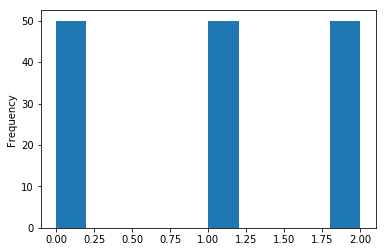

In [20]:
iris_df['target'].plot.hist()

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

Decision Tree min_samples_leaf=2
Decision Tree min_samples_leaf=12
Decision Tree min_samples_leaf=22
Decision Tree min_samples_leaf=32
Decision Tree min_samples_leaf=42
Decision Tree min_samples_leaf=52
Decision Tree min_samples_leaf=62
Decision Tree min_samples_leaf=72


Text(0, 0.5, 'accuracy')

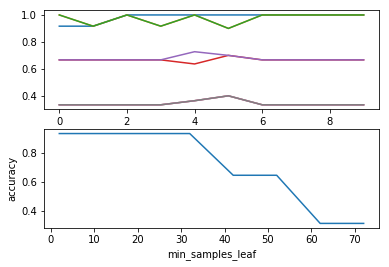

In [67]:
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

clfs = {}
indices = []
accuracy_record = []
score_record = []

for i in np.arange(2, N * 0.1, 10):
    indices.append(int(i))
    clfs[f"Decision Tree min_samples_leaf={int(i)}"] = tree.DecisionTreeClassifier(min_samples_leaf=int(i))

#plt.figure(1)
plt.subplot(211)
for name, clf in clfs.items():
    print(f"{name}")
    model = clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_record.append(accuracy)
    
    scores = cross_val_score(clf, x_train, y_train, cv=10)
    score_record.append(scores)
    plt.plot(scores)

plt.subplot(212)
plt.plot(indices, accuracy_record)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")

    #predict_proba = model.predict_proba(x_test)
    #fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_proba[:, 1], pos_label=1)
    #auc = metrics.auc(fpr, tpr)
    #print("{} : {}".format(name, auc))
    #plt.plot(fpr, tpr, label=name)
    #plt.legend()
    #scores = cross_val_score(clf, iris.data, iris.target, cv=10)

In [71]:
results = {}

for name, clf in clfs.items():
    results[name] = []
    for i in range(len(accuracy_record)):
        results[name].append(i)

results_df = pd.DataFrame(data=results)